<a href="https://colab.research.google.com/github/Pawel1996/Master_thesis_project/blob/main/Master_thesis_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/scikit-learn-contrib/DESlib

In [ ]:
import numpy as np
import random
import math
from google.colab import files
import io
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import geometric_mean_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_breast_cancer

from deslib.des.des_p import DESP
from deslib.des.knora_u import KNORAU
from deslib.des.knora_e import KNORAE
from deslib.des.meta_des import METADES

from scipy.stats import ranksums
from scipy.stats import rankdata
from tabulate import tabulate

#Ustawienie stałych#


In [ ]:
K = 10
tau = 0.3
number_of_algorithms = 4

results_to_chart_acc = np.zeros((12, 5))
results_to_chart_bac = np.zeros((12, 5))
results_to_chart_g_mean = np.zeros((12, 5))

std_to_chart_acc = np.zeros((12,5))
std_to_chart_bac = np.zeros((12,5))
std_to_chart_g_mean = np.zeros((12,5))

scaler = StandardScaler()

#Przygotowanie zbiorów danych#



In [ ]:
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
##### Zbiory danych powinny być wczytywane osobno, dlatego w danym momencie tylko jeden z nich może być odkomentowany #####

# X, y = make_classification(n_samples=411, n_features=10, n_informative=10, n_redundant=0, random_state=1, weights=[0.65])
# y[y == 0] = -1

### 0. breast_cancer
# data = load_breast_cancer()
# X = data.data
# y = data.target
# y[y == 0] = -1
# dataset_number = 0

### 1. pima_indians
# data = pd.read_csv('pima-indians-diabetes.csv', error_bad_lines=False, header=None)
# data = data.to_numpy()
# X = data[:, :-1]
# y = data[:, -1]
# y[y == 0] = -1
# dataset_number = 1


### 2. banknote_authentication
# data = pd.read_csv('data_banknote_authentication.csv', header=None)
# data = data.to_numpy()
# X = data[:, :-1]
# y = data[:, -1]
# y[y == 0] = -1
# dataset_number = 2

### 3. heart_disease
# data = pd.read_csv('heart.csv', header=None)
# data = data.to_numpy()
# X = data[:, :-1]
# y = data[:, -1]
# y[y == 0] = -1
# dataset_number = 3

### 4. wine
# data = pd.read_csv('wine.csv', header=0)
# data = data.apply(LabelEncoder().fit_transform)
# data = data.to_numpy()
# X = data[:, :-1]
# y = data[:, -1]
# y[y == 0] = -1
# dataset_number = 4

### 5. sonar
# data = pd.read_csv('sonar.csv', header=None)
# data = data.to_numpy()
# X = data[:, :-1]
# y = data[:, -1]
# y[y == 'R'] = -1
# y[y == 'M'] = 1
# y = y.astype(int)
# dataset_number = 5

### 6. ionosphere
# data = pd.read_csv('ionosphere.csv', header=None)
# data = data.to_numpy()
# X = data[:, :-1]
# y = data[:, -1]
# y[y == 'b'] = -1
# y[y == 'g'] = 1
# y = y.astype(int)
# dataset_number = 6

### 7. audit_data
# data = pd.read_csv('audit_data.csv', header=0)
# data = data.apply(LabelEncoder().fit_transform)
# data = data.to_numpy()
# X = data[:, :-1]
# y = data[:, -1]
# y[y == 0] = -1
# dataset_number = 7

### 8. algerian_forest_fires
# data = pd.read_csv('algerian_forest_fires.csv', header=None)
# data = data.to_numpy()
# X = data[:, :-1]
# y = data[:, -1]
# y[y == 'not fire'] = -1
# y[y == 'not fire '] = -1
# y[y == 'not fire   '] = -1
# y[y == 'fire'] = 1
# y[y == 'fire '] = 1
# y[y == 'fire   '] = 1
# y = y.astype(int)
# dataset_number = 8

### 9. loan_prediction
# data = pd.read_csv('loan_prediction.csv', header=0)
# data.drop(columns=['Loan_ID'], inplace=True)
# data = data.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)), axis=0, result_type='expand')
# data = data.to_numpy()
# X = data[:, :-1]
# y = data[:, -1]
# y[y == 0] = -1
# dataset_number = 9

### 10. diabetes
data = pd.read_csv('diabetes.csv', header=0)
data.drop(columns=['patient_number'], inplace=True)
data = data.apply(LabelEncoder().fit_transform)
data = data.to_numpy()
X = data[:, :-1]
y = data[:, -1]
y[y == 0] = -1
dataset_number = 10

### 11. covid_dataset
# data = pd.read_csv('covid_dataset.csv', header=0)
# data = data.apply(LabelEncoder().fit_transform)
# data = data.to_numpy()
# X = data[:, :-1]
# y = data[:, -1]
# y[y == 0] = -1
# dataset_number = 11


print(np.count_nonzero(y == 1) / y.shape[0])
print(X.shape, y.shape)
X = scaler.fit_transform(X)
X, y = shuffle(X, y, random_state=3)
while not X.shape[0] % K == 0:
  X = np.delete(X, -1, axis=0)
  y = np.delete(y, -1, axis=0)


final_results_acc = []
final_results_bac = []
final_results_g_mean = []

final_std_acc = []
final_std_bac =[]
final_std_g_mean = []


# Główna pętla algorytmu (RES) #

In [ ]:
# Przygotowanie do stratyfikowanej kroswalidacji
skf = StratifiedKFold(n_splits=K)

# Liczba obiektów typu x0 w foldzie testowym - jest to liczba wykonań środkowej pętli z iteratorem "j"
samples_number_in_test_fold = int(X.shape[0]/K)
print(samples_number_in_test_fold)

# Stworzenie tablicy numpy, w których przechowywane będą wyniki.
# Kolejne wiersze to inny fold testowy, w każdym wierszu są zawarte wyniki dla wszystkich obiektów z foldu testowego.
RES = np.zeros((K, samples_number_in_test_fold))

# Stworzenie tablicy numpy do przechowtwania oczekiwanych klas dla każdego foldu testowego.
# Wielkość taka sama jak RES, dzięki czemu możliwe będzie liczenie metryk. 
y_test_folds = np.zeros((K, samples_number_in_test_fold))

# Każdy obieg pętli to wykonanie jednej części kroswalidacji. 
# Dla 10CV pętla wykona się 10 razy.
for k, (train_index, test_index) in enumerate(skf.split(X, y)):

  # Podział na zbiór uczący oraz zbiór testowy za pomocą funkcji StratifiedKFold()
  X_train, X_test_fold = X[train_index], X[test_index]
  y_train, y_test_fold = y[train_index], y[test_index]

  # Zapis prawidłowego zestawu klas do y_test_folds
  y_test_folds[k] = y_test_fold
  
  # Podział zbioru uczącego na K-1 foldów
  X_train_folds = np.split(X_train, K-1)
  y_train_folds = np.split(y_train, K-1)
  X_train_folds = np.array(X_train_folds)
  y_train_folds = np.array(y_train_folds)

  # Stworzenie listy na klasyfikatory bazowe oraz tablic numpy, w których przechowywane będą wyniki
  clf_B = []
  clf_B_results = np.zeros((K-1, 2))
  clf_B_results_scaled = np.zeros((K-1))

  # Wypełnienie listy clf_B klasyfikatorami bazowymi SVM
  for i in range(K-1):
    clf_B.append(SVC(kernel='linear', probability=True))
    clf_B[i].fit(X_train_folds[i], y_train_folds[i])

  # Środkowa pętla, każdy jej obieg dokonuje zaklasyfikowania dla jednego obiektu ze zbioru testowego
  for j in range(samples_number_in_test_fold):
    # Podział zbioru danych na K-1 foldów
    X_train_folds = np.split(X_train, K-1)
    y_train_folds = np.split(y_train, K-1)

    # Skopiowanie foldów D1, D2, ..., D9 do foldów DS(-1)1, DS(-1)2, ..., DS(-1)9 oraz tak samo do foldów DS(1)1, DS(1)2, ..., DS(1)9
    X_train_folds_negative = X_train_folds.copy()
    y_train_folds_negative = y_train_folds.copy()
    X_train_folds_positive = X_train_folds.copy()
    y_train_folds_positive = y_train_folds.copy()

    # Dodanie obiektu x0 do zbiorów, w których użyte zostanie douczanie
    for i in range(K-1):
      X_train_folds_negative[i] = np.vstack([X_train_folds_negative[i], X_test_fold[j]])
      y_train_folds_negative[i] = np.hstack([y_train_folds_negative[i], -1])
      X_train_folds_positive[i] = np.vstack([X_train_folds_positive[i], X_test_fold[j]])
      y_train_folds_positive[i] = np.hstack([y_train_folds_positive[i], 1])

    # Zamiana wszystkich list na tablice numpy
    X_train_folds = np.array(X_train_folds)
    y_train_folds = np.array(y_train_folds)
    X_train_folds_negative = np.array(X_train_folds_negative)
    y_train_folds_negative = np.array(y_train_folds_negative)
    X_train_folds_positive = np.array(X_train_folds_positive)
    y_train_folds_positive = np.array(y_train_folds_positive)

    # Zadeklarowanie list, w których umieszczone zostaną klafyikatory
    clf_R_negative = []
    clf_R_positive = []

    # Utworzenie tablic numpy do przechowywania wyników klasyfikatorów z douczaniem
    clf_R_negative_results = np.zeros((K-1, 2))
    clf_R_negative_results_scaled = np.zeros((K-1))
    clf_R_positive_results = np.zeros((K-1, 2))
    clf_R_positive_results_scaled = np.zeros((K-1))

    # Utworzenie tablic numpy dla wyników obliczeń zmiennych omega(-1) oraz omega(1) oraz tablicy dla wyników częściowych
    omega_negative = np.zeros((K-1))
    omega_positive = np.zeros((K-1))
    RES_part = np.zeros((K-1))

    # Pętla wewnętrzna - następuje w niej uczenie klasyfikatorów na przypisanych do nich foldach,
    # wykonywanie obliczeń oraz podejowanie decyzji odnośnie włączenia lub nie danego klasyfikatora
    # do zespołu klasyfikatorów - jest to proces dynamicznej selekcji
    for i in range(K-1):
      # Dodanie klasyfikatorów SVM do list (po 9 w każdej grupie, bo każdy będzie się uczył na jednym z 9 foldów testowych)
      clf_R_positive.append(SVC(kernel='linear', probability=True))
      clf_R_negative.append(SVC(kernel='linear', probability=True))
      
      # Wytrenowanie wszystkich klasyfikatorów, każdego na jednym foldzie (punkty 4-6)
      clf_R_negative[i].fit(X_train_folds_negative[i], y_train_folds_negative[i])
      clf_R_positive[i].fit(X_train_folds_positive[i], y_train_folds_positive[i])

      # Obliczanie predykcji każdego klasyfikatora dla danego x0 
      clf_B_results[i] = clf_B[i].predict_proba(X_test_fold[j].reshape(1,-1))
      clf_B_results_scaled[i] = - clf_B_results[i,0] + clf_B_results[i,1]

      clf_R_negative_results[i] = clf_R_negative[i].predict_proba(X_test_fold[j].reshape(1,-1))
      clf_R_negative_results_scaled[i] = - clf_R_negative_results[i,0] + clf_R_negative_results[i,1]

      clf_R_positive_results[i] = clf_R_positive[i].predict_proba(X_test_fold[j].reshape(1,-1))
      clf_R_positive_results_scaled[i] = - clf_R_positive_results[i,0] + clf_R_positive_results[i,1]

      # Obliczanie wartości obu omeg dla każdego foldu
      omega_negative[i] = abs(clf_B_results_scaled[i] - clf_R_negative_results_scaled[i])
      omega_positive[i] = abs(clf_B_results_scaled[i] - clf_R_positive_results_scaled[i])

      # Porównanie z tau (Punkt 9)
      if min(omega_negative[i], omega_positive[i]) <= tau:
        RES_part[i] = clf_B_results_scaled[i]
      else:
        RES_part[i] = 0

    # Punkt 10 - ostateczna klasyfikacja danego obiektu
    RES[k,j] = np.sign(sum(RES_part))
    
    # W razie gdyby klasyfikator nie wiedział, do której klasy przyporządkować dany obiekt następuje losowanie
    # (praktycznie się nie zdarza dla odpowiednio wysokiej wartości tau)
    if RES[k,j] == 0:
      RES[k,j] = random.choice([-1, 1])

In [ ]:
acc_results = []
bac_results = []
g_mean_results = []

for i in range(K):
  acc_results.append(accuracy_score(y_test_folds[i], RES[i]))
  bac_results.append(balanced_accuracy_score(y_test_folds[i], RES[i]))
  g_mean_results.append(geometric_mean_score(y_test_folds[i], RES[i]))
  tn, fp, fn, tp = confusion_matrix(y_test_folds[i], RES[i]).ravel()
  print('specificity = ', tn / (tn+fp))
  print('sensitivity = ', tp / (tp+fn))
acc_result_res = np.mean(acc_results)
bac_result_res = np.mean(bac_results)
g_mean_result_res = np.mean(g_mean_results)

acc_result_res_std = np.std(acc_results)
bac_result_res_std = np.std(bac_results)
g_mean_result_res_std = np.std(g_mean_results)

print(acc_results)
print(acc_result_res)
print("STD: ", acc_result_res_std)

print(bac_results)
print(bac_result_res)
print("STD: ", bac_result_res_std)

print(g_mean_results)
print(g_mean_result_res)
print("STD: ", g_mean_result_res_std)

final_results_acc.append(acc_result_res)
final_results_bac.append(bac_result_res)
final_results_g_mean.append(g_mean_result_res)

final_std_acc.append(acc_result_res_std)
final_std_bac.append(bac_result_res_std)
final_std_g_mean.append(g_mean_result_res_std)

# DESlib - algorytmy #

In [ ]:
skf = StratifiedKFold(n_splits=K)
samples_number_in_test_fold = int(X.shape[0]/K)

# desp_results = np.zeros((K, samples_number_in_test_fold))
y_pred = np.zeros((number_of_algorithms, K, samples_number_in_test_fold))
y_test_folds = np.zeros((K, samples_number_in_test_fold))

acc_results = np.zeros((number_of_algorithms, K))
bac_results = np.zeros((number_of_algorithms, K))
g_mean_results = np.zeros((number_of_algorithms, K))

acc_result_des = np.zeros((number_of_algorithms))
bac_result_des = np.zeros(number_of_algorithms)
g_mean_result_des = np.zeros(number_of_algorithms)


In [ ]:
for k, (train_index, test_index) in enumerate(skf.split(X, y)):
  X_train, X_test_fold = X[train_index], X[test_index]
  y_train, y_test_fold = y[train_index], y[test_index]
  y_test_folds[k] = y_test_fold
  
  # Podział zbioru treningowego na treningowy dla zestawu klasyfikatorów oraz treningowy dla algorytmu dynamicznej selekcji
  X_train, X_dsel, y_train, y_dsel = train_test_split(X_train, y_train, test_size=0.5)
  
  # Tworzenie zestawu klasyfikatorów SVM
  model = svm.SVC(kernel='linear', probability=True)
  svm_classifiers = BaggingClassifier(model, n_estimators=9)
  svm_classifiers.fit(X_train, y_train)

  algorithms = [DESP(svm_classifiers), KNORAU(svm_classifiers), KNORAE(svm_classifiers), METADES(svm_classifiers)]
  
  for j, algorithm in enumerate(algorithms):
    algorithm.fit(X_dsel, y_dsel)
    y_pred[j,k] = algorithm.predict(X_test_fold)
    acc_results[j,k] = accuracy_score(y_test_fold, y_pred[j,k])
    bac_results[j,k] = balanced_accuracy_score(y_test_fold, y_pred[j,k])
    g_mean_results[j,k] = geometric_mean_score(y_test_fold, y_pred[j,k])

for j in range(number_of_algorithms):
  final_results_acc.append(np.mean(acc_results[j]))
  final_results_bac.append(np.mean(bac_results[j]))
  final_results_g_mean.append(np.mean(g_mean_results[j]))
  final_std_acc.append(np.std(acc_results[j]))
  final_std_bac.append(np.std(bac_results[j]))
  final_std_g_mean.append(np.std(g_mean_results[j]))

# final_results_acc.append(acc_result_des)
# final_results_bac.append(bac_result_des)
# final_results_g_mean.append(g_mean_result_des)


In [ ]:
# results_to_chart_acc.append(final_results_acc)
# results_to_chart_bac.append(final_results_bac)
# results_to_chart_g_mean.append(final_results_g_mean)

results_to_chart_acc[dataset_number] = final_results_acc
results_to_chart_bac[dataset_number] = final_results_bac
results_to_chart_g_mean[dataset_number] = final_results_g_mean

std_to_chart_acc[dataset_number] = final_std_acc
std_to_chart_bac[dataset_number] = final_std_bac
std_to_chart_g_mean[dataset_number] = final_std_g_mean

print("Accuracy: ")
print(results_to_chart_acc)
print()
print(std_to_chart_acc)
print("\n\nBalanced accuracy: ")
print(results_to_chart_bac)
print()
print(std_to_chart_bac)
print("\n\nG-mean: ")
print(results_to_chart_g_mean)
print()
print(std_to_chart_g_mean)

In [ ]:
# np.save('results_acc', results_to_chart_acc)
# np.save('results_bac', results_to_chart_bac)
# np.save('results_g_mean', results_to_chart_g_mean)

# np.save('std_acc', std_to_chart_acc)
# np.save('std_bac', std_to_chart_bac)
# np.save('std_g_mean', std_to_chart_g_mean)

# Prezentacja wyników #

In [ ]:
acc = np.load('results_acc.npy')
bac = np.load('results_bac.npy')
g_mean = np.load('results_g_mean.npy')

acc_std = np.load('std_acc.npy')
bac_std = np.load('std_bac.npy')
g_mean_std = np.load('std_g_mean.npy')

print(acc)

[[0.95535714 0.9625     0.9625     0.96428571 0.95892857]
 [0.74868421 0.76842105 0.76710526 0.75921053 0.75263158]
 [0.98175182 0.98394161 0.98467153 0.98686131 0.98759124]
 [0.82666667 0.84       0.82333333 0.80666667 0.80333333]
 [0.73962264 0.74025157 0.73710692 0.75157233 0.75220126]
 [0.785      0.755      0.775      0.775      0.785     ]
 [0.82571429 0.88       0.87428571 0.88       0.88285714]
 [0.98441558 0.98051948 0.98051948 0.97922078 0.98311688]
 [0.91666667 0.91666667 0.90833333 0.91666667 0.91666667]
 [0.76721311 0.80819672 0.80819672 0.80655738 0.80819672]
 [0.87435897 0.91538462 0.91794872 0.91794872 0.90769231]
 [0.96850829 0.97034991 0.97090239 0.97513812 0.97440147]]


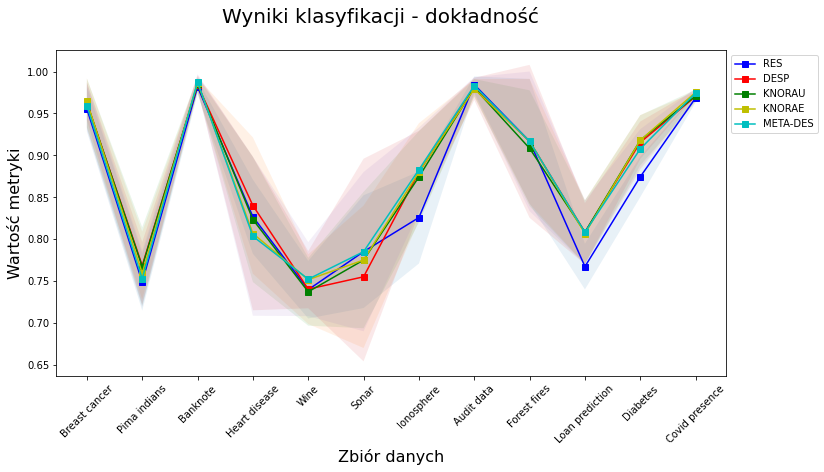

In [ ]:
fig = plt.figure(figsize=(12,6))
fig.suptitle('Wyniki klasyfikacji - dokładność', fontsize=20)
plt.xlabel('Zbiór danych', fontsize=16)
plt.ylabel('Wartość metryki', fontsize=16)
x = np.array(np.linspace(0,11,12))

plt.xticks(range(12), ['Breast cancer','Pima indians','Banknote','Heart disease', 'Wine', 'Sonar', 'Ionosphere', 'Audit data', 'Forest fires', 'Loan prediction', 'Diabetes', 'Covid presence'], rotation=45)

plt.plot(x, acc[:,0], 'b', label='RES', markevery=[0,1,2,3,4,5,6,7,8,9,10,11], marker='s')
plt.fill_between(x, acc[:,0]-acc_std[:,0], acc[:,0]+acc_std[:,0], alpha=0.1)
plt.plot(x, acc[:,1], 'r', label='DESP', markevery=[0,1,2,3,4,5,6,7,8,9,10,11], marker='s')
plt.fill_between(x, acc[:,1]-acc_std[:,1], acc[:,1]+acc_std[:,1], alpha=0.1)
plt.plot(x, acc[:,2], 'g', label='KNORAU', markevery=[0,1,2,3,4,5,6,7,8,9,10,11], marker='s')
plt.fill_between(x, acc[:,2]-acc_std[:,2], acc[:,2]+acc_std[:,2], alpha=0.1)
plt.plot(x, acc[:,3], 'y', label='KNORAE', markevery=[0,1,2,3,4,5,6,7,8,9,10,11], marker='s')
plt.fill_between(x, acc[:,3]-acc_std[:,3], acc[:,3]+acc_std[:,3], alpha=0.1)
plt.plot(x, acc[:,4], 'c', label='META-DES', markevery=[0,1,2,3,4,5,6,7,8,9,10,11], marker='s')
plt.fill_between(x, acc[:,4]-acc_std[:,4], acc[:,4]+acc_std[:,4], alpha=0.1)


plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('acc_line_chart')
plt.show()

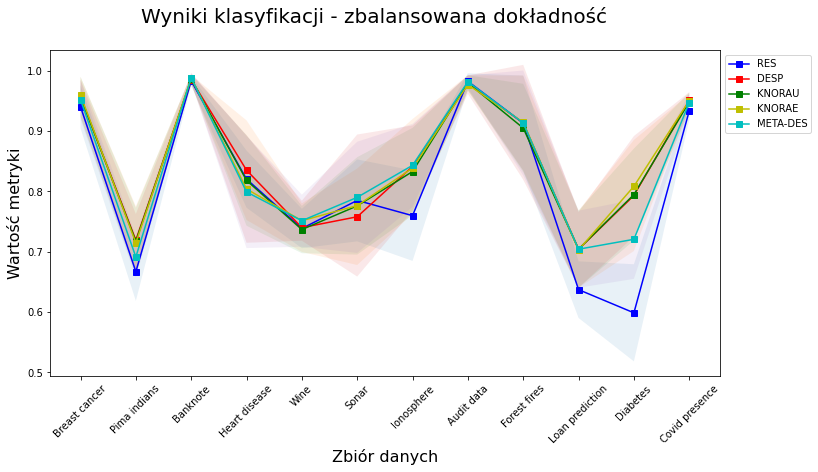

In [ ]:
fig = plt.figure(figsize=(12,6))
fig.suptitle('Wyniki klasyfikacji - zbalansowana dokładność', fontsize=20)
plt.xlabel('Zbiór danych', fontsize=16)
plt.ylabel('Wartość metryki', fontsize=16)
x = np.array(np.linspace(0,11,12))

plt.xticks(range(12), ['Breast cancer','Pima indians','Banknote','Heart disease', 'Wine', 'Sonar', 'Ionosphere', 'Audit data', 'Forest fires', 'Loan prediction', 'Diabetes', 'Covid presence'], rotation=45)

plt.plot(x, bac[:,0], 'b', label='RES', markevery=[0,1,2,3,4,5,6,7,8,9,10,11], marker='s')
plt.fill_between(x, bac[:,0]-bac_std[:,0], bac[:,0]+bac_std[:,0], alpha=0.1)
plt.plot(x, bac[:,1], 'r', label='DESP', markevery=[0,1,2,3,4,5,6,7,8,9,10,11], marker='s')
plt.fill_between(x, bac[:,1]-bac_std[:,1], bac[:,1]+bac_std[:,1], alpha=0.1)
plt.plot(x, bac[:,2], 'g', label='KNORAU', markevery=[0,1,2,3,4,5,6,7,8,9,10,11], marker='s')
plt.fill_between(x, bac[:,2]-bac_std[:,2], bac[:,2]+bac_std[:,2], alpha=0.1)
plt.plot(x, bac[:,3], 'y', label='KNORAE', markevery=[0,1,2,3,4,5,6,7,8,9,10,11], marker='s')
plt.fill_between(x, bac[:,3]-bac_std[:,3], bac[:,3]+bac_std[:,3], alpha=0.1)
plt.plot(x, bac[:,4], 'c', label='META-DES', markevery=[0,1,2,3,4,5,6,7,8,9,10,11], marker='s')
plt.fill_between(x, bac[:,4]-bac_std[:,4], bac[:,4]+bac_std[:,4], alpha=0.1)


plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('bac_line_chart')
plt.show()

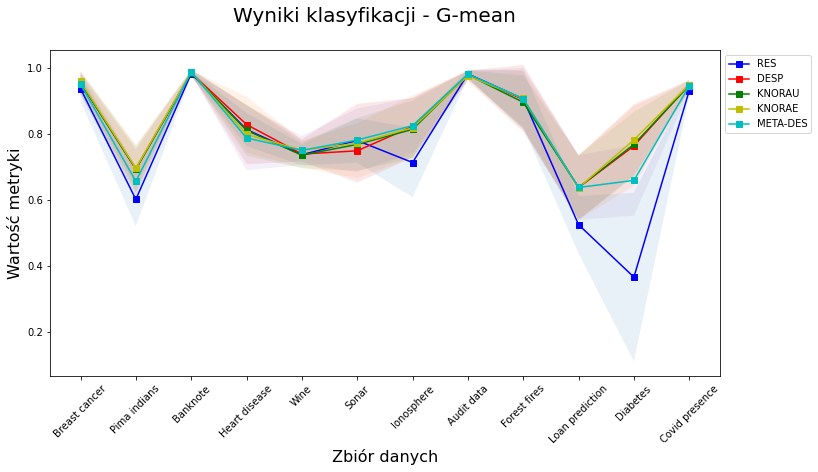

In [ ]:
fig = plt.figure(figsize=(12,6))
fig.suptitle('Wyniki klasyfikacji - G-mean', fontsize=20)
plt.xlabel('Zbiór danych', fontsize=16)
plt.ylabel('Wartość metryki', fontsize=16)
x = np.array(np.linspace(0,11,12))

plt.xticks(range(12), ['Breast cancer','Pima indians','Banknote','Heart disease', 'Wine', 'Sonar', 'Ionosphere', 'Audit data', 'Forest fires', 'Loan prediction', 'Diabetes', 'Covid presence'], rotation=45)

plt.plot(x, g_mean[:,0], 'b', label='RES', markevery=[0,1,2,3,4,5,6,7,8,9,10,11], marker='s')
plt.fill_between(x, g_mean[:,0]-g_mean_std[:,0], g_mean[:,0]+g_mean_std[:,0], alpha=0.1)
plt.plot(x, g_mean[:,1], 'r', label='DESP', markevery=[0,1,2,3,4,5,6,7,8,9,10,11], marker='s')
plt.fill_between(x, g_mean[:,1]-g_mean_std[:,1], g_mean[:,1]+g_mean_std[:,1], alpha=0.1)
plt.plot(x, g_mean[:,2], 'g', label='KNORAU', markevery=[0,1,2,3,4,5,6,7,8,9,10,11], marker='s')
plt.fill_between(x, g_mean[:,2]-g_mean_std[:,2], g_mean[:,2]+g_mean_std[:,2], alpha=0.1)
plt.plot(x, g_mean[:,3], 'y', label='KNORAE', markevery=[0,1,2,3,4,5,6,7,8,9,10,11], marker='s')
plt.fill_between(x, g_mean[:,3]-g_mean_std[:,3], g_mean[:,3]+g_mean_std[:,3], alpha=0.1)
plt.plot(x, g_mean[:,4], 'c', label='META-DES', markevery=[0,1,2,3,4,5,6,7,8,9,10,11], marker='s')
plt.fill_between(x, g_mean[:,4]-g_mean_std[:,4], g_mean[:,4]+g_mean_std[:,4], alpha=0.1)


plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('g_mean_line_chart')
plt.show()

### Tabele ###


In [ ]:
# np.savetxt('acc.csv', results_to_chart_acc)

# for i in range(12):
#   print('Numer: ', i)
#   print(np.around(g_mean[i],3))
#   print(np.around(g_mean_std[i],3))

# Testy statystyczne #

In [ ]:
ranks = []
for ms in bac:
    ranks.append(rankdata(ms).tolist())
ranks = np.array(ranks)
print("\nRanks:\n", ranks)

mean_ranks = np.mean(ranks, axis=0)
print("\nMean ranks:\n", mean_ranks)



Ranks:
 [[1.  3.5 3.5 5.  2. ]
 [1.  5.  4.  3.  2. ]
 [1.  2.  3.  4.  5. ]
 [4.  5.  3.  2.  1. ]
 [2.  3.  1.  5.  4. ]
 [4.  1.  2.  3.  5. ]
 [1.  4.  2.  3.  5. ]
 [5.  2.5 2.5 1.  4. ]
 [3.  3.  1.  5.  3. ]
 [1.  4.  4.  2.  4. ]
 [1.  3.  4.  5.  2. ]
 [1.  5.  3.  4.  2. ]]

Mean ranks:
 [2.08333333 3.41666667 2.75       3.5        3.25      ]


In [ ]:
alfa = 0.05
clfs_number = 5

w_statistic = np.zeros((clfs_number, clfs_number))
p_value = np.zeros((clfs_number, clfs_number))

for i in range(clfs_number):
    for j in range(clfs_number):
        w_statistic[i, j], p_value[i, j] = ranksums(ranks.T[i], ranks.T[j])

In [ ]:
headers = ['RES', 'DESP', 'KNORAU', 'KNORAE', 'META-DES']
names_column = np.expand_dims(np.array(headers), axis=1)
w_statistic_table = np.concatenate((names_column, w_statistic), axis=1)
w_statistic_table = tabulate(w_statistic_table, headers, floatfmt=".2f")
p_value_table = np.concatenate((names_column, p_value), axis=1)
p_value_table = tabulate(p_value_table, headers, floatfmt=".2f")
print("\nw-statistic:\n", w_statistic_table, "\n\np-value:\n", p_value_table)


w-statistic:
             RES    DESP    KNORAU    KNORAE    META-DES
--------  -----  ------  --------  --------  ----------
RES        0.00   -2.08     -1.30     -2.19       -1.99
DESP       2.08    0.00      1.24     -0.17        0.32
KNORAU     1.30   -1.24      0.00     -1.36       -0.87
KNORAE     2.19    0.17      1.36      0.00        0.46
META-DES   1.99   -0.32      0.87     -0.46        0.00 

p-value:
             RES    DESP    KNORAU    KNORAE    META-DES
--------  -----  ------  --------  --------  ----------
RES        1.00    0.04      0.19      0.03        0.05
DESP       0.04    1.00      0.21      0.86        0.75
KNORAU     0.19    0.21      1.00      0.17        0.39
KNORAE     0.03    0.86      0.17      1.00        0.64
META-DES   0.05    0.75      0.39      0.64        1.00


In [ ]:
advantage = np.zeros((clfs_number, clfs_number))
advantage[w_statistic > 0] = 1
advantage_table = tabulate(np.concatenate(
    (names_column, advantage), axis=1), headers)
print("\nAdvantage:\n", advantage_table)



Advantage:
             RES    DESP    KNORAU    KNORAE    META-DES
--------  -----  ------  --------  --------  ----------
RES           0       0         0         0           0
DESP          1       0         1         0           1
KNORAU        1       0         0         0           0
KNORAE        1       1         1         0           1
META-DES      1       0         1         0           0


In [ ]:
significance = np.zeros((clfs_number, clfs_number))
significance[p_value <= alfa] = 1
significance_table = tabulate(np.concatenate(
    (names_column, significance), axis=1), headers)
print("\nStatistical significance (alpha = 0.05):\n", significance_table)


In [ ]:
stat_better = significance * advantage
stat_better_table = tabulate(np.concatenate(
    (names_column, stat_better), axis=1), headers)
print("Statistically significantly better:\n", stat_better_table)


Statistically significantly better:
             RES    DESP    KNORAU    KNORAE    META-DES
--------  -----  ------  --------  --------  ----------
RES           0       0         0         0           0
DESP          1       0         0         0           0
KNORAU        0       0         0         0           0
KNORAE        1       0         0         0           0
META-DES      1       0         0         0           0
